#Twitter Sentiment Analysis

Uses Naive Bayes Classifier. 
TextBlob library- with inbuilt Naive Bayes Classifier

In [86]:
# Minor Project
# AYUSH SHARMA
# 2K19/SE/027

In [ ]:
# Description: Sentiment analysis on tweets parsed directly from live Twitter feed

#Import Libraries and Define Functions

In [ ]:
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os

In [ ]:
clearConsole = lambda: os.system('cls' if os.name in ('nt', 'dos') else 'clear')

In [ ]:
# Function to clean the tweets text
# Uses Regular Expressions (re) library

def cleanText(text):
  text= re.sub(r'@[A-Za-z0-9]+', '', text)  #Removes @ mentions
  text=re.sub(r'#', '', text)               #Removes hash tags
  text=re.sub(r'RT[\s]+', '', text)         #Remove Re tweet symbol
  text=re.sub(r'https?:\/\/\S+', '', text)  #Removes any hyperlinks from the tweet

  return text

In [ ]:
#Function to calculate subjectivity of a tweet
#Using TextBlob

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
#Function to calculate polarity of a tweet
#using TextBlob

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
#Analyse

def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
# Rumour Detection
def fact_opinion(score, t1=0.25, t2=0.75):
  if score<t1:
    return 'Fact'
  elif score<t2:
    return 'Neutral'
  else:
    return 'Opinion'

#Twiiter Authentication

In [ ]:
# Twitter API credentials
# Which are secret so I can't reveal them
# Hence I will upload them from csv file I made
cred= pd.read_csv('credentials.csv')

In [ ]:
ck = cred['consumer_key'][0]
cs = cred['consumer_secret'][0]
ak = cred['access_key'][0]
as_ = cred['access_secret'][0]

In [ ]:
# Authenticate
auth = tweepy.OAuthHandler(ck,cs)

# Access 
auth.set_access_token(ak, as_)

#API
api= tweepy.API(auth, wait_on_rate_limit=True)

#Gather Tweets

In [87]:
#Initialise the posts array
num_posts=500   #Number of tweets you want to extract
posts=[]

In [88]:
# Listener Object

class Listener (tweepy.StreamListener):

  def on_status(self, status):
    global num_posts
    if num_posts>0:
      posts.append(status.text)
      num_posts-=1
    
    else:
      print("Collected desired number of posts")
      return False

  def on_error(self, status_code):
    if status_code == 420:
      return False


In [89]:
listener_= Listener()

myStream = tweepy.Stream(auth = api.auth, listener=listener_)

In [90]:
myStream.filter(track=['Indian Cricket Team', 'Cricket', 'World Cup', 'T20', 'Virat Kohli', 'Rohit Sharma', 
                       'Jasprit Bumrah', 'Ind vs NZ', 'Ind vs Pak', 'India vs New Zealand', 'India vs Pakistan', 'Test match'], languages=['en'])

Collected desired number of posts


In [91]:
len(posts)

500

In [92]:
for tweet in posts[0:5]:
  print(tweet+'\n')

Only one makes it through to The Final... who ya got?

Adelaide, you won't wanna miss this! Get your tickets now 🎟… https://t.co/U20UM43M5A

RT @WasimJaffer14: Warne won 1 World Cup.
Warner won 2 World Cups.
Looking forward to seeing an Aussie kid named Warnest win 3 World Cups.…

RT @man4_cricket: Rohit Sharma moves to Number 13 position in the latest ICC T20I Batting Rankings.

16 is the number of teams that qualified for the finals of the FIFA World Cup from 1934 through 1978 (although for… https://t.co/IPhOST20fM

A special coaching event organised by @GlamCricket and @CricketWales held at Rydal Penrhos was hailed as a tremendo… https://t.co/OyGudckkEw



In [93]:
df = pd.DataFrame([tweet for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Only one makes it through to The Final... who ...
1,RT @WasimJaffer14: Warne won 1 World Cup.\nWar...
2,RT @man4_cricket: Rohit Sharma moves to Number...
3,16 is the number of teams that qualified for t...
4,A special coaching event organised by @GlamCri...


In [94]:
df.to_csv('tweets_posts.csv')

# Clean Tweets

In [95]:
#Clean the Tweets text

df['Tweets']=df['Tweets'].apply(cleanText)

df

,Tweets
0,Only one makes it through to The Final... who ...
1,: Warne won 1 World Cup.\nWarner won 2 World C...
2,_cricket: Rohit Sharma moves to Number 13 posi...
3,16 is the number of teams that qualified for t...
4,A special coaching event organised by and he...
...,...
495,I am not impressed by your cricket.\nIdiot ....
496,Autumn series provides glorious glimpse of wha...
497,We are awaiting any recommendations from a...
498,": I played competitive football, rugby &amp; c..."


In [96]:
df.to_csv("tweets_clean.csv")

#Sentiment Analysis

In [ ]:
df= pd.read_csv('tweets_clean.csv')

In [97]:
# Get the subjectivity and polarity of tweets

# Subjectivity- [0 to 1]. More subjective means the tweet is more opinionated than fact
# Polarity- [-1 to 1]. Positive means good, negative means bad

df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#Display
df

,Tweets,Subjectivity,Polarity
0,Only one makes it through to The Final... who ...,1.000000,0.000000
1,: Warne won 1 World Cup.\nWarner won 2 World C...,0.400000,0.800000
2,_cricket: Rohit Sharma moves to Number 13 posi...,0.900000,0.500000
3,16 is the number of teams that qualified for t...,0.000000,0.000000
4,A special coaching event organised by and he...,0.571429,0.357143
...,...,...,...
495,I am not impressed by your cricket.\nIdiot ....,0.900000,-0.650000
496,Autumn series provides glorious glimpse of wha...,0.000000,0.000000
497,We are awaiting any recommendations from a...,0.125000,0.000000
498,": I played competitive football, rugby &amp; c...",0.500000,0.500000


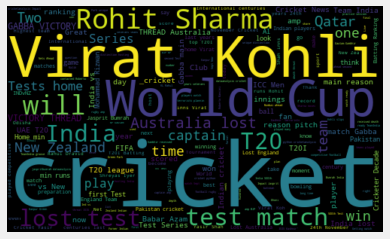

In [98]:
# Plot Word Cloud

allWords= ' '.join( [twts for twts in df['Tweets']] )
wordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [99]:
# Get Analysis

df['Analysis']=df['Polarity'].apply(getAnalysis)

#Display
df

,Tweets,Subjectivity,Polarity,Analysis
0,Only one makes it through to The Final... who ...,1.000000,0.000000,Neutral
1,: Warne won 1 World Cup.\nWarner won 2 World C...,0.400000,0.800000,Positive
2,_cricket: Rohit Sharma moves to Number 13 posi...,0.900000,0.500000,Positive
3,16 is the number of teams that qualified for t...,0.000000,0.000000,Neutral
4,A special coaching event organised by and he...,0.571429,0.357143,Positive
...,...,...,...,...
495,I am not impressed by your cricket.\nIdiot ....,0.900000,-0.650000,Negative
496,Autumn series provides glorious glimpse of wha...,0.000000,0.000000,Neutral
497,We are awaiting any recommendations from a...,0.125000,0.000000,Neutral
498,": I played competitive football, rugby &amp; c...",0.500000,0.500000,Positive


In [100]:
# See whether the tweets are fact based or opinionated

df['Facts']= df['Subjectivity'].apply(fact_opinion)

df

,Tweets,Subjectivity,Polarity,Analysis,Facts
0,Only one makes it through to The Final... who ...,1.000000,0.000000,Neutral,Opinion
1,: Warne won 1 World Cup.\nWarner won 2 World C...,0.400000,0.800000,Positive,Neutral
2,_cricket: Rohit Sharma moves to Number 13 posi...,0.900000,0.500000,Positive,Opinion
3,16 is the number of teams that qualified for t...,0.000000,0.000000,Neutral,Fact
4,A special coaching event organised by and he...,0.571429,0.357143,Positive,Neutral
...,...,...,...,...,...
495,I am not impressed by your cricket.\nIdiot ....,0.900000,-0.650000,Negative,Opinion
496,Autumn series provides glorious glimpse of wha...,0.000000,0.000000,Neutral,Fact
497,We are awaiting any recommendations from a...,0.125000,0.000000,Neutral,Fact
498,": I played competitive football, rugby &amp; c...",0.500000,0.500000,Positive,Neutral


In [101]:
# Display all the Positive Tweets

ptweets= df[df.Analysis=='Positive']
ptweets= ptweets['Tweets']
ptweets

1      : Warne won 1 World Cup.\nWarner won 2 World C...
2      _cricket: Rohit Sharma moves to Number 13 posi...
4      A special coaching event organised by  and  he...
6      : OTD in 1976.  3-0 . A team full of 1974 Worl...
7      Abu Dhabi T10 is in full-swing as the greatest...
                             ...                        
490    : 🇮🇳 THE GABBA VICTORY\n[ A THREAD ]\n\nAustra...
491    _Odisha: Wish the Indian junior hockey team al...
493    : OnThisDay in 2009\n\nUmar Akmal, playing his...
494    : Getting match ready 👌 👌\n\nTeamIndia get int...
498    : I played competitive football, rugby &amp; c...
Name: Tweets, Length: 248, dtype: object

In [102]:
# Display all the Negative Tweets

ntweets= df[df.Analysis=='Negative']
ntweets= ntweets['Tweets']
ntweets

9      _Mystical:  I stopped watching these grown chi...
27     _don_: Rohit Sharma moves to 13 rank in icc Me...
31     : Highest % of team runs for India in Tests at...
36     _venkat: Rohit Sharma to be blamed for this fo...
39     Thank God you knocked 20 balls off the short f...
42     : Expected, was never leaving the European Cha...
45     : Highest Test Average at Home:-\n[min. 1500 r...
58     AjinkyaRahane was not amused with questions re...
60     Windies is very near to break the Indian recor...
72     There’ll be a few of the  family in attendance...
75     _se_hai: Dear    either ensure transparency in...
80      _robin I couldn’t agree more Nick and hate to...
87     : Highest Test Average at Home:-\n[min. 1500 r...
95     : 🇳🇱 Mathieu van der Poel and 🇧🇪 Wout van Aert...
117    _49: I think his HS of 202 is against Australi...
121    : Fifa football conference today for clubs and...
122    ***1977 Albums World Cup Tournament****\n\nGRO...
132    Quote of the day: Don’t 

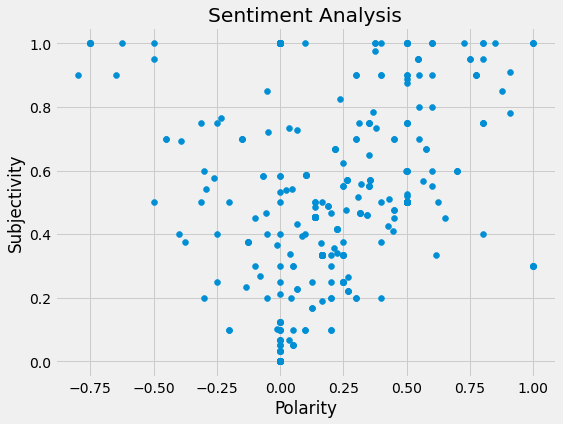

In [103]:
# Plot the sentiment analysis

fig = plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'],df['Subjectivity'])
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [104]:
# Visualise the percentage of positive and negative tweets

pos = (ptweets.shape[0]/df.shape[0])*100
neg = (ntweets.shape[0]/df.shape[0])*100

print("Positive: "+ str(pos)+ "%\nNegative: "+ str(neg))

Positive: 49.6%
Negative: 10.0


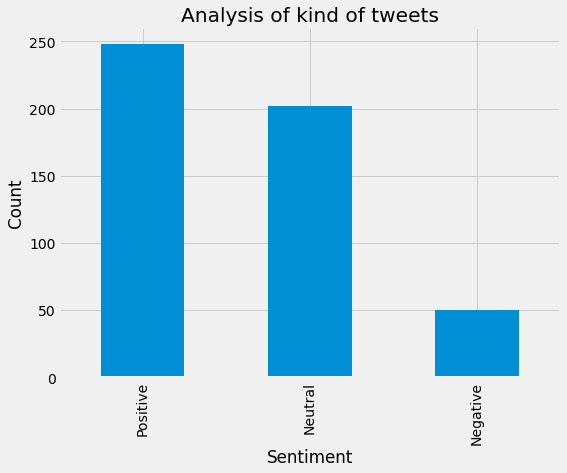

In [105]:
fig= plt.figure(figsize=(8,6))
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Analysis of kind of tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

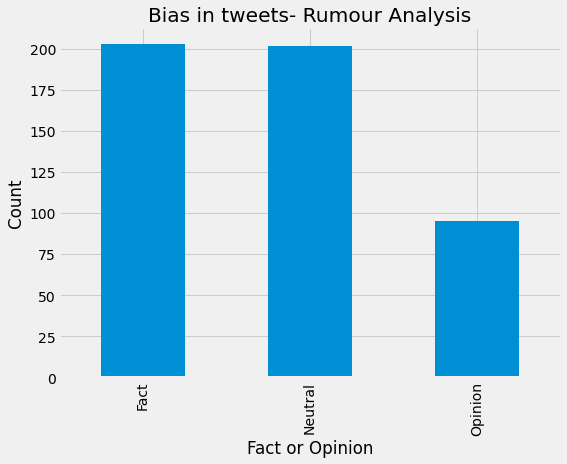

In [106]:
# Visualise the number of tweets that are factual vs the tweets that are biased

fig= plt.figure(figsize=(8,6))
df['Facts'].value_counts().plot(kind='bar')
plt.title("Bias in tweets- Rumour Analysis")
plt.xlabel("Fact or Opinion")
plt.ylabel("Count")
plt.show()

In [107]:
df.to_csv('tweets_data.csv')